## Sim Demo

### Imports

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of models.base_models failed: Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 305, in update_function
    setattr(old, name, getattr(new, n

In [30]:
from env.imports import *

In [31]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)


<module 'data.data_utils' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_utils.py'>

#### Check job specs

In [32]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 9.9%
RAM Usage: 23.9%
Available RAM: 287.0G
Total RAM: 377.1G
52.4G


In [33]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: Quadro RTX 8000 - Memory Allocated: 0.02 GB


In [34]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [35]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: wi80ara5
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/wi80ara5
Initialized sweep with ID: wi80ara5
2
3
4
BEST CONFIG {'input_dim': 14760, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'min_child_weight': 3, 'scale_pos_weight': 1, 'batch_size': 512, 'epochs': 1}
[0]	validation_0-rmse:0.17714
[1]	validation_0-rmse:0.17422
[2]	validation_0-rmse:0.17102
[3]	validation_0-rmse:0.16884
[4]	validation_0-rmse:0.16651
[5]	validation_0-rmse:0.16480
[6]	validation_0-rmse:0.16327
[7]	validation_0-rmse:0.16183
[8]	validation_0-rmse:0.16069
[9]	validation_0-rmse:0.16017
[10]	validation_0-rmse:0.15933
[11]	validation_0-rmse:0.15879
[12]	validation_0-rmse:0.15769
[13]	validation_0-rmse:0.15703
[14]	validation_0-rmse:0.15661
[15]	validation_0-rmse:0.15598
[16]	validation_0-rmse:0.15576
[17]	validation_0-rmse:0.15467
[18]	validation_0-rmse:0.

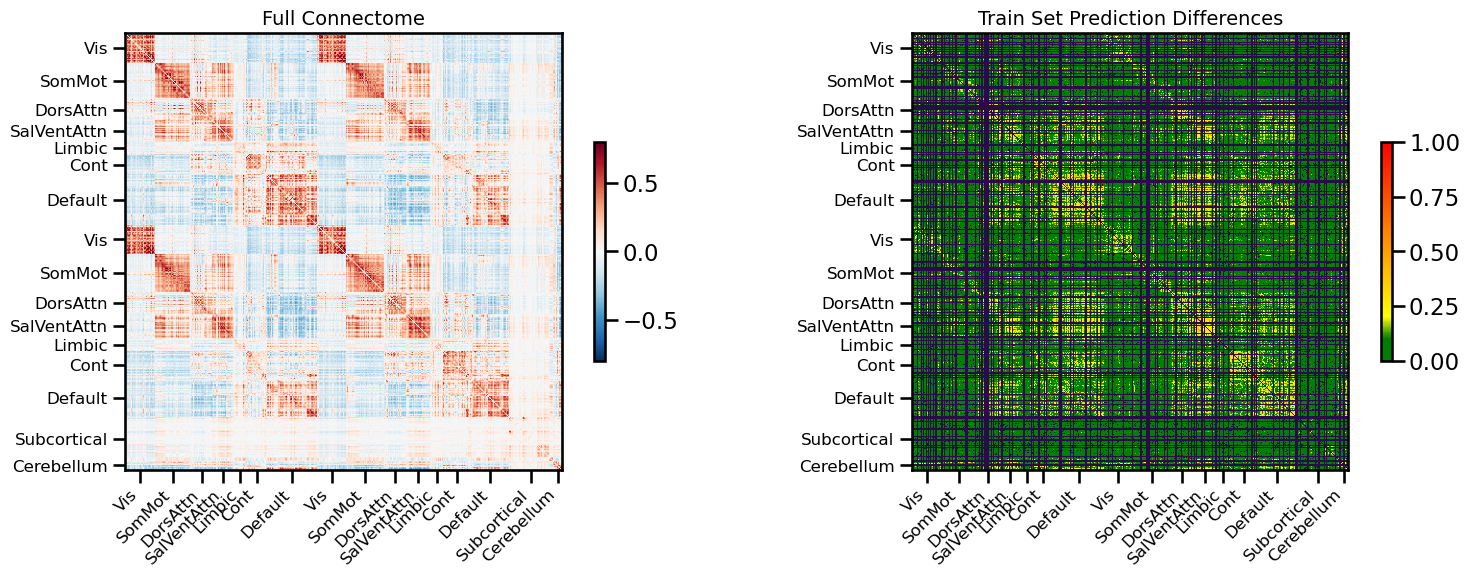

<Figure size 640x480 with 0 Axes>

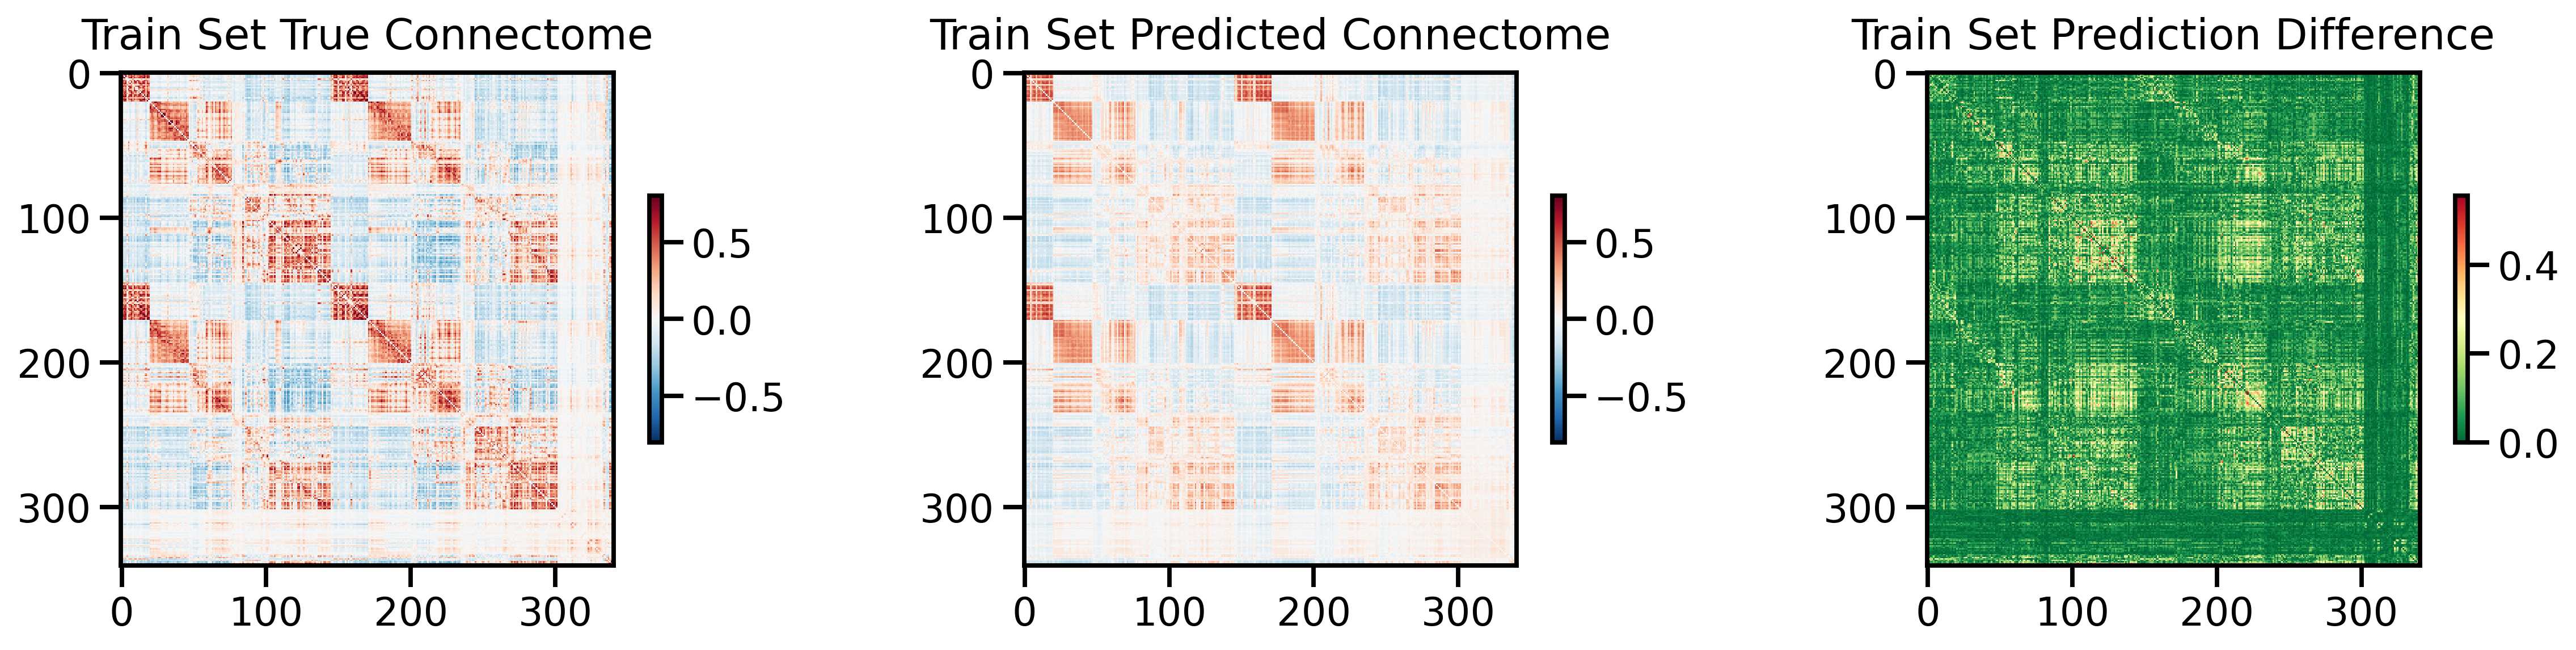

<Figure size 640x480 with 0 Axes>

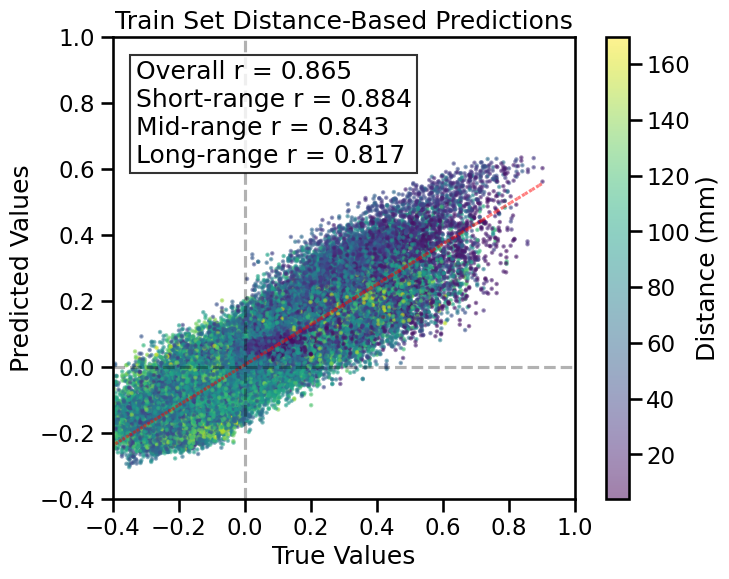

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

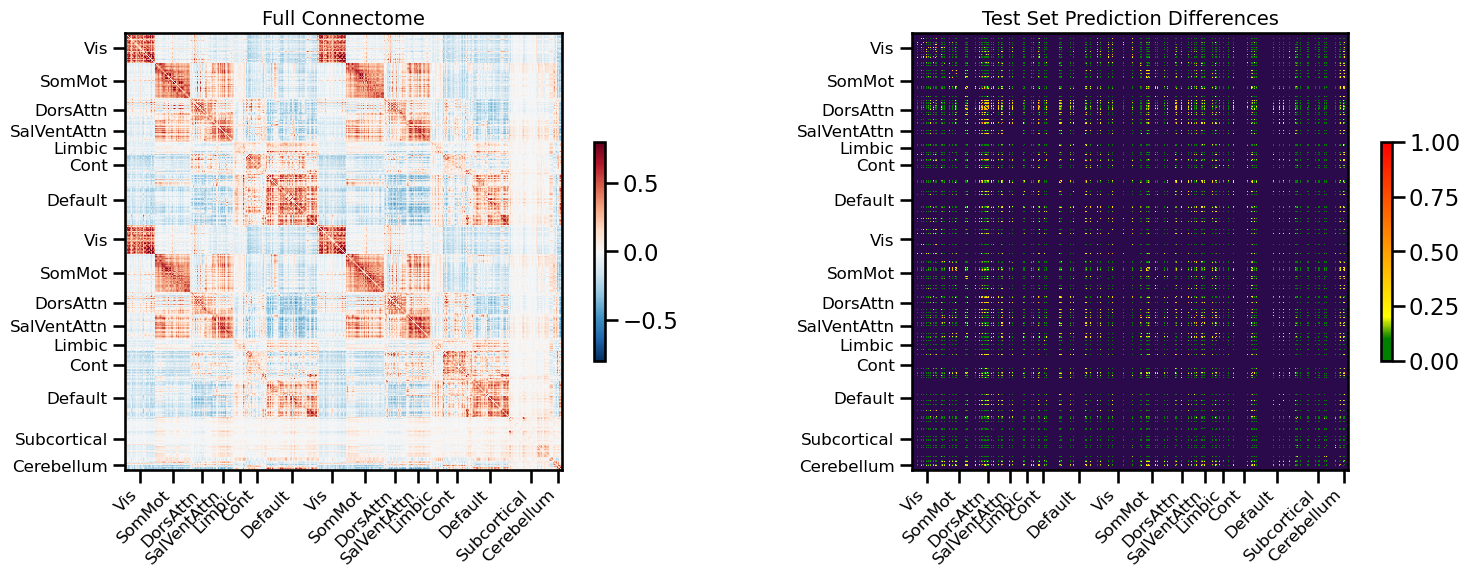

<Figure size 640x480 with 0 Axes>

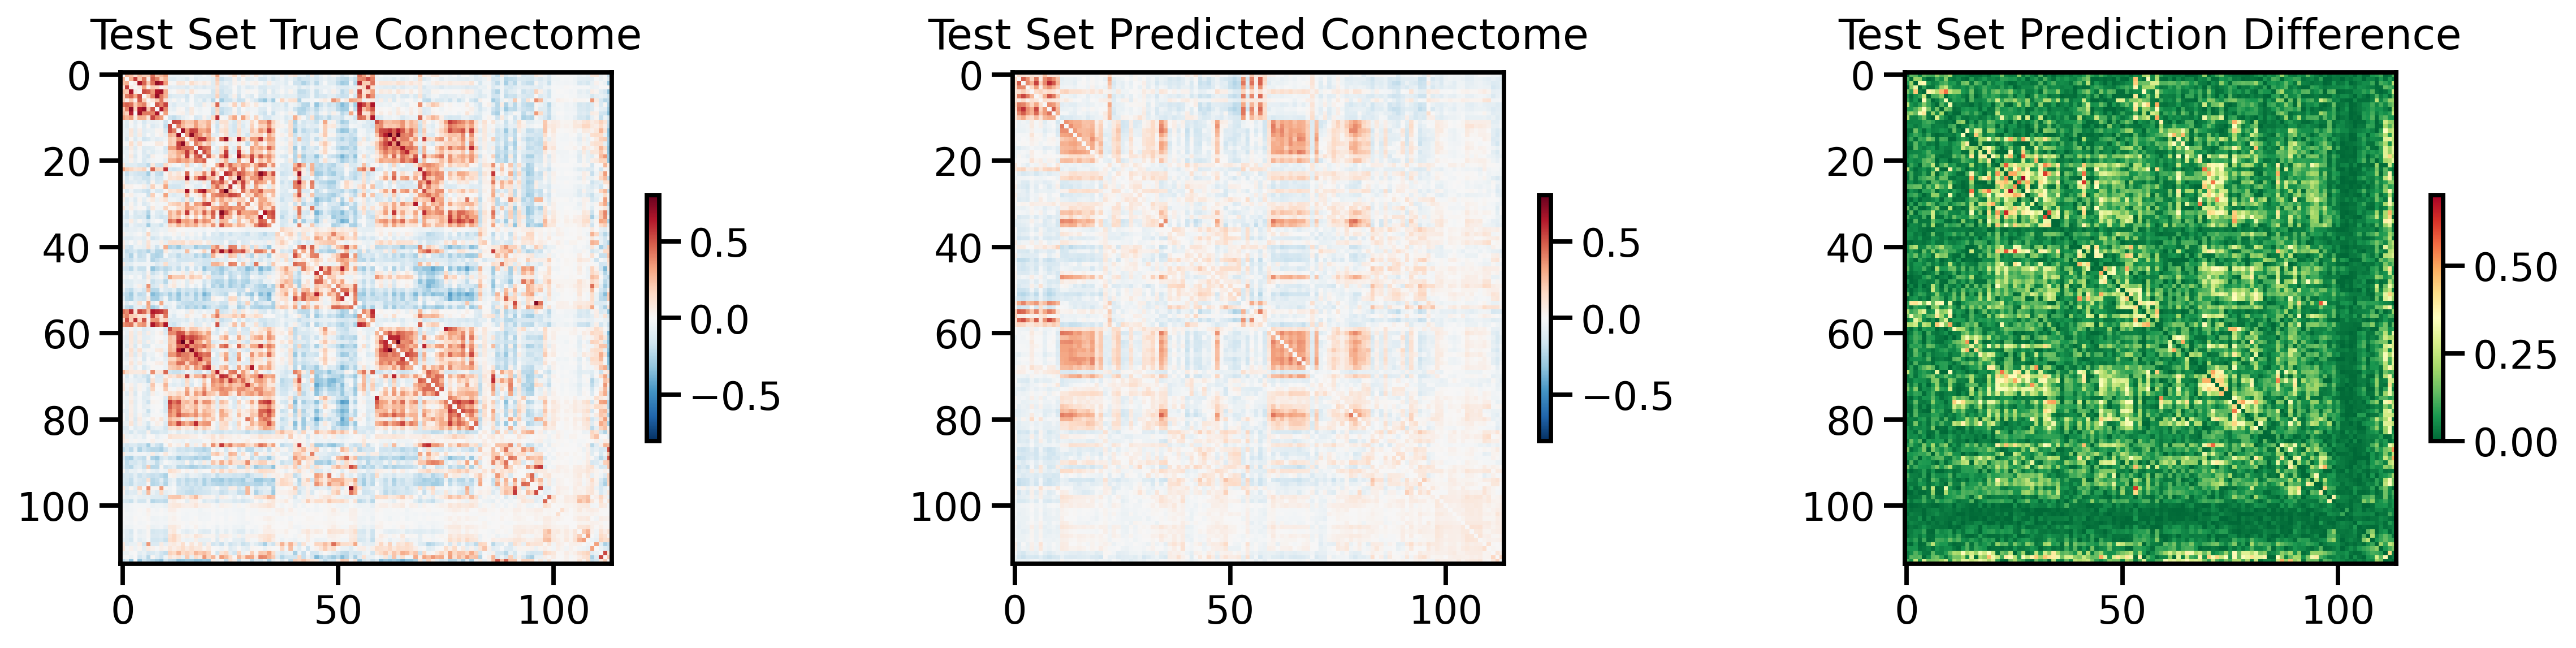

<Figure size 640x480 with 0 Axes>

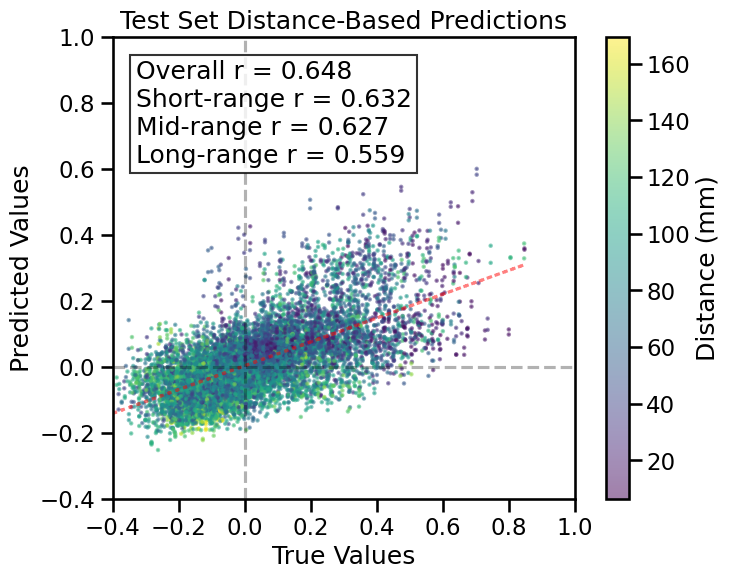

TRAIN METRICS
GLOBAL: mse=0.009390, mae=0.069382, r2=0.7228, pearson_r=0.8652, spearman_r=0.8541, geodesic_distance=25.2814
DISTANCE-BASED: short=0.8842, mid=0.8429, long=0.8169
HEMISPHERIC: left=0.8626, right=0.8783, inter=0.8657
CONNECTION STRENGTH: neg=0.1023, weak=0.8013, pos=0.5041
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.8676    0.8787
  Default       0.7932    0.8527
  SalVentAttn    0.8933    0.8920
  Limbic        0.8803    0.9027
  DorsAttn      0.9185    0.9085
  SomMot        0.9152    0.9035
  Vis           0.9183    0.8908
  Subcortical    0.8227    0.8602
  Cerebellum    0.8731    0.8515

TEST METRICS
GLOBAL: mse=0.019374, mae=0.099709, r2=0.4082, pearson_r=0.6485, spearman_r=0.6331, geodesic_distance=17.2303
DISTANCE-BASED: short=0.6323, mid=0.6268, long=0.5588
HEMISPHERIC: left=0.6285, right=0.6602, inter=0.6584
CONNECTION STRENGTH: neg=-0.0331, weak=0.5606, pos=0.2531
NETWORK CORRELATIONS:
  NETWORK      

0

<Figure size 640x480 with 0 Axes>

In [36]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=False,
              skip_cv=True,
              model_type='xgboost',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()